<a href="https://colab.research.google.com/github/tanushree-dwibedi/Celebal-Assignment4/blob/main/Exploratory%20Data%20Analysis%20(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

/tmp/ipython-input-3-2152948929.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Survived', palette='Set2')


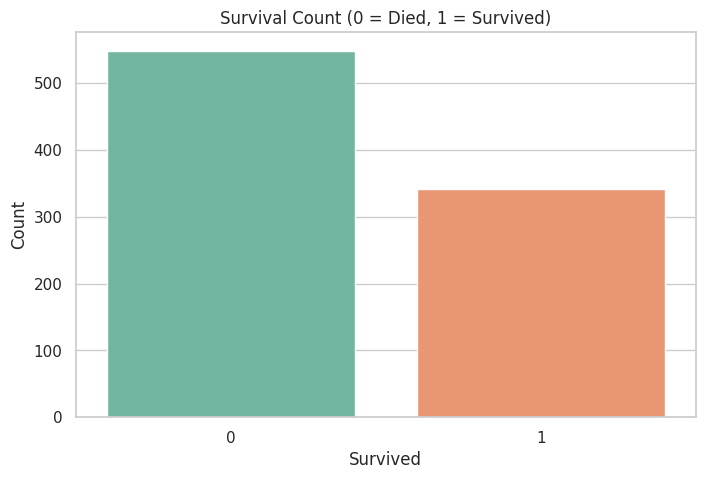

/tmp/ipython-input-3-2152948929.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sex', palette='Set1')


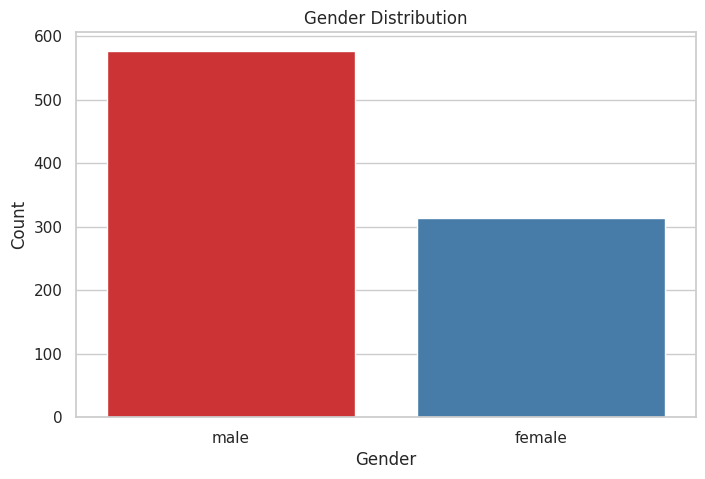

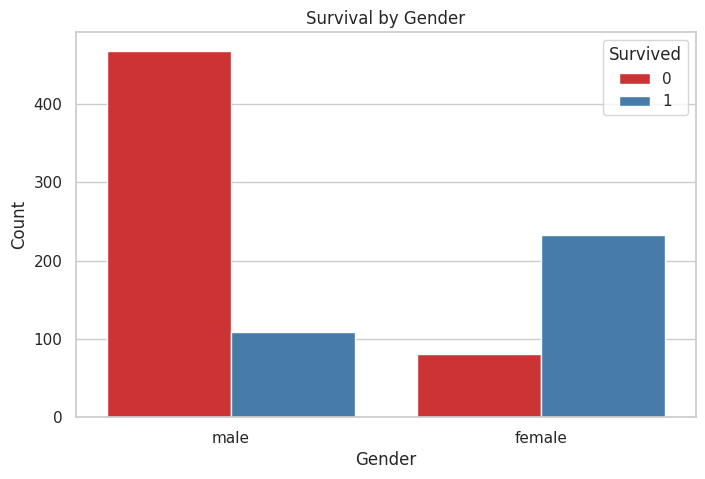

/tmp/ipython-input-3-2152948929.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Pclass', palette='Set3')


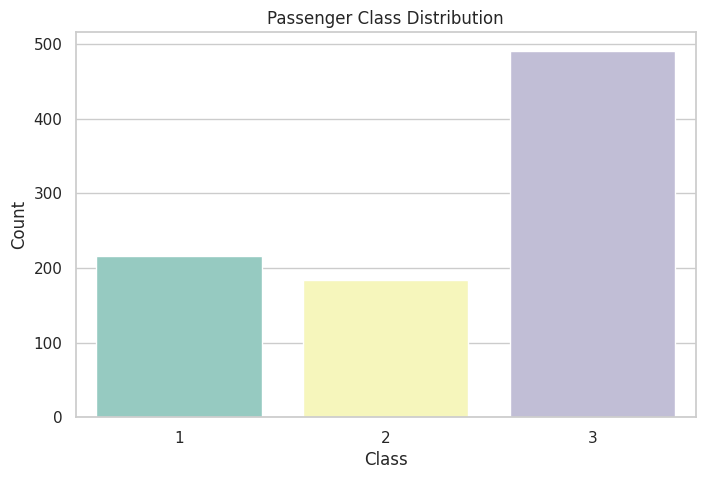

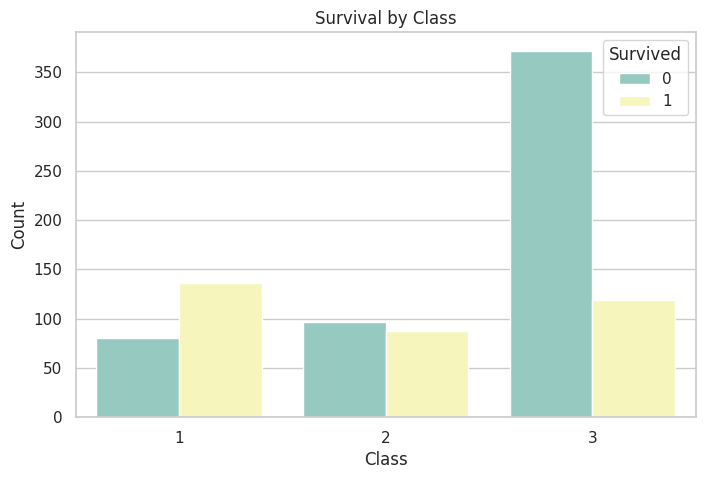

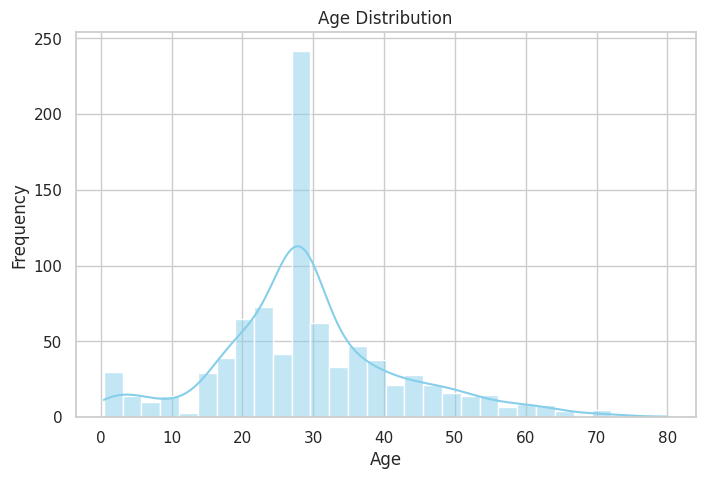

/tmp/ipython-input-3-2152948929.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Survived', y='Age', palette='coolwarm')


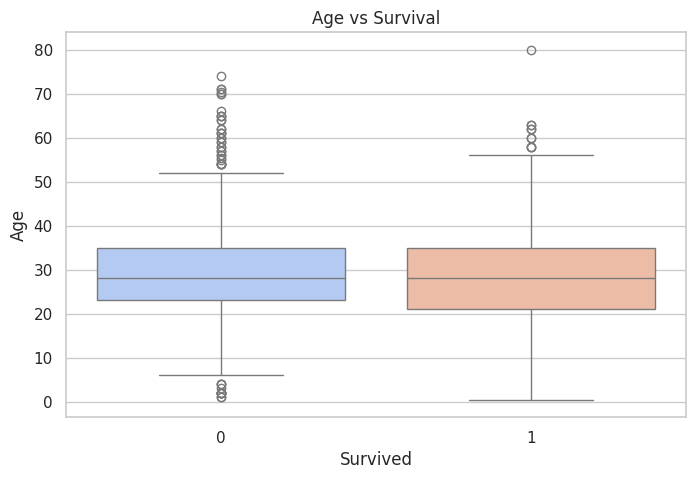

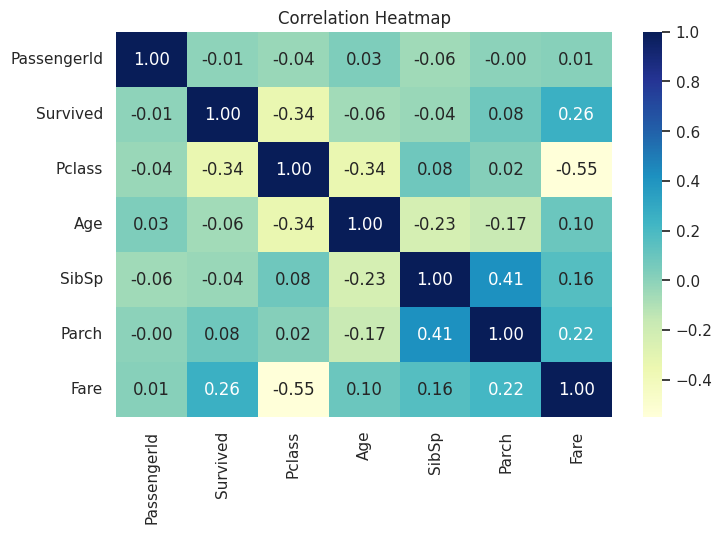

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8, 5)

# Load Titanic dataset from URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Show first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Show missing values
print("\nMissing values before cleaning:")
print(df.isnull().sum())

# Fill missing Age with median and Embarked with mode
df = df.copy()  # to avoid chained assignment warnings
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop the 'Cabin' column
df.drop(columns='Cabin', inplace=True)

# Re-check missing values
print("\nMissing values after cleaning:")
print(df.isnull().sum())

# ======================
#       Visualizations
# ======================

# 1. Survival count
sns.countplot(data=df, x='Survived', palette='Set2')
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.xlabel("Survived"); plt.ylabel("Count")
plt.show()

# 2. Gender distribution
sns.countplot(data=df, x='Sex', palette='Set1')
plt.title("Gender Distribution")
plt.xlabel("Gender"); plt.ylabel("Count")
plt.show()

# 3. Survival by gender
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set1')
plt.title("Survival by Gender")
plt.xlabel("Gender"); plt.ylabel("Count")
plt.legend(title='Survived')
plt.show()

# 4. Passenger class distribution
sns.countplot(data=df, x='Pclass', palette='Set3')
plt.title("Passenger Class Distribution")
plt.xlabel("Class"); plt.ylabel("Count")
plt.show()

# 5. Survival by class
sns.countplot(data=df, x='Pclass', hue='Survived', palette='Set3')
plt.title("Survival by Class")
plt.xlabel("Class"); plt.ylabel("Count")
plt.legend(title='Survived')
plt.show()

# 6. Age distribution
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age"); plt.ylabel("Frequency")
plt.show()

# 7. Age vs Survival
sns.boxplot(data=df, x='Survived', y='Age', palette='coolwarm')
plt.title("Age vs Survival")
plt.xlabel("Survived"); plt.ylabel("Age")
plt.show()

# 8. Correlation heatmap (numeric only)
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
